# Evaluation

## Accuracy

2clusters:
- 100,000 datapoints
- 10 dims
- 2 clusters
- 10% outliers
- noiseMatrix:
2	1
3	6
4	7
5	8
6	9
10	10

4clusters:
- 100,000 datapoints
- 10 dims
- 4 clusters
- 10% outliers
- noiseMatrix:
1	1	1	3
3	2	3	4
5	3	4	6
7	5	7	7
8	9	8	9
10	10	9	10

Similar accuracy experiment as in [MAFIA] is done by creating a small data set with 100,000 records in 10 dimensions. The first case, has two clusters embedded in a different 4 dimensional subspace. Second case, has 4 clusters embedded in a different 4 dimensional subspace.

MAFIA reports the correct clusters in both cases with proper use of parameters. However, CLIQUE reports 

## CDUs

- 500,000 datapoints
- 8 dims
- 1 clusters
- 10% outliers
- noiseMatrix:
1
3
5
7

## Cluster dimensionality

general:
- 500,000 datapoints
- 30 dims
- 1 clusters
- 10% outliers

2d: 2 dims per cluster
4d: 4 dims per cluster
...

## Data dimensionality

general:
- 1,000,000 data points
- 3 clusters
- 10% outliers
- 5 dims per cluster
- max distinct cluster dims = 9

10d: 10 dimensions
20d 20 dimensions
...

## Data set size

general:
- 20 dimensions
- 5 clusters
- 0% outliers
- 5 dims per cluster

1mio: 1,000,000 data points
2mio: 2,000,000 data points

kunne ikke 26 dims

## Sensitivity
As observed in article. Alpha and beta controls the number of clusters and their quality.


- 1,000,000 data points
- 20 dims
- 5 clusters
- 10% outliers
- noiseMatrix:
1
3
5
7
8

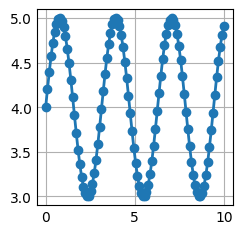

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 1 * np.sin(2 * x)

# plot
plt.plot(x, y, 'o-', linewidth=2)
plt.show()